In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import os

## export setting

In [2]:
strDate = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
icd_version = "10"
output_path = ""
input_path = "icd10/icd10_title_vector.csv"


In [3]:
if icd_version == "10":
    output_path = "icd10_result"
else:
    output_path = "icd9_result"

if os.path.isdir(output_path) == False:
    os.mkdir(output_path)

output_path = output_path+"/"+strDate

if os.path.isdir(output_path) == False:
    os.mkdir(output_path)

In [4]:
df_ori = pd.read_csv(input_path)
df = df_ori 
df.columns


Index(['disease', 'icd_code', 'title', 'vector'], dtype='object')

In [5]:
df.head()

,disease,icd_code,title,vector
0,schizophrenia,F200,Paranoid schizophrenia,3.113538
1,schizophrenia,F201,Disorganized schizophrenia,2.425204
2,schizophrenia,F202,Catatonic schizophrenia,2.529963
3,schizophrenia,F203,Undifferentiated schizophrenia,2.455258
4,schizophrenia,F205,Residual schizophrenia,1.930425


## check outlier by scatterplot 

In [6]:
df["disease_type"] = 0

df["disease_type"] = df["disease_type"].astype(int)

dg = df.groupby('disease')

lstDiseaseT = []

for group_key, group_value in dg:
    if group_key not in lstDiseaseT:
        lstDiseaseT.append(group_key)
    df.loc[(df.disease == group_key),['disease_type']] = lstDiseaseT.index(group_key)

print(lstDiseaseT) 


['alcohol_abuse', 'alzheimer', 'anxiety', 'autism', 'bipolar', 'depression', 'diabetes', 'digestive_condition', 'drug_abuse', 'heart_type_disease', 'hemorrhagic_stroke', 'hyperlipidemia', 'hypertension', 'ischemic_stroke', 'neurological_type_disease', 'peripheral_vascular_disease', 'psychosis', 'schizophrenia']


In [7]:
df.head()

,disease,icd_code,title,vector,disease_type
0,schizophrenia,F200,Paranoid schizophrenia,3.113538,17
1,schizophrenia,F201,Disorganized schizophrenia,2.425204,17
2,schizophrenia,F202,Catatonic schizophrenia,2.529963,17
3,schizophrenia,F203,Undifferentiated schizophrenia,2.455258,17
4,schizophrenia,F205,Residual schizophrenia,1.930425,17


In [8]:
df.loc[(df.disease_type == 1),:].head()

,disease,icd_code,title,vector,disease_type
892,alzheimer,F0390,Unspecified dementia without behavioral distur...,1.496489,1
893,alzheimer,F05,Delirium due to known physiological condition,1.164716,1
894,alzheimer,G300,onset,2.559547,1
895,alzheimer,G301,onset,2.559547,1
896,alzheimer,G308,disease,2.595520,1


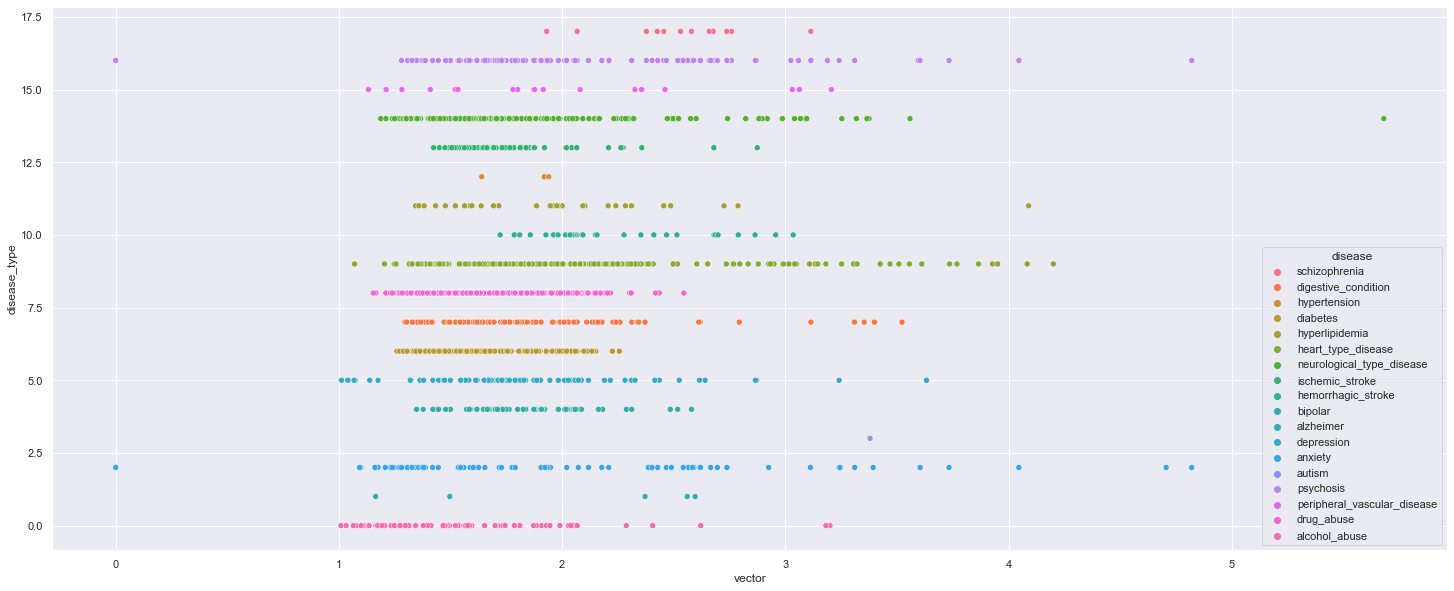

In [9]:
sns.set(rc = {'figure.figsize':(25,10)})
g = sns.scatterplot(x = df.vector ,y = df.disease_type, hue=df.disease)
strFileName = output_path+"/icd"+icd_version+"_outlier.jpeg"
plt.savefig(strFileName, dpi = 300)


## calculate: avg,median,std,max value,min value,std count,std count(avg)

In [10]:
df["AVG"]=0
df["MEDIAN"]=0
df["STD"]=0
df["MAX"]=0
df["MIN"]=0
 
for strD in lstDiseaseT:
    max = float(df.loc[(df.disease==strD),["vector"]].max())
    min = float(df.loc[(df.disease==strD),["vector"]].min())
    avg = float(df.loc[(df.disease==strD),["vector"]].mean())
    med = float(df.loc[(df.disease==strD),["vector"]].median())
    std = float(df.loc[(df.disease==strD),["vector"]].std())

    df.loc[(df.disease == strD),['MAX']] = max
    df.loc[(df.disease == strD),['MIN']] = min
    df.loc[(df.disease == strD),['AVG']] = avg
    df.loc[(df.disease == strD),['MEDIAN']] = med
    df.loc[(df.disease == strD),['STD']] = std


df.head()


,disease,icd_code,title,vector,disease_type,AVG,MEDIAN,STD,MAX,MIN
0,schizophrenia,F200,Paranoid schizophrenia,3.113538,17,2.52545,2.554457,0.314709,3.113538,1.930425
1,schizophrenia,F201,Disorganized schizophrenia,2.425204,17,2.52545,2.554457,0.314709,3.113538,1.930425
2,schizophrenia,F202,Catatonic schizophrenia,2.529963,17,2.52545,2.554457,0.314709,3.113538,1.930425
3,schizophrenia,F203,Undifferentiated schizophrenia,2.455258,17,2.52545,2.554457,0.314709,3.113538,1.930425
4,schizophrenia,F205,Residual schizophrenia,1.930425,17,2.52545,2.554457,0.314709,3.113538,1.930425


In [11]:
df["STD_COUNT"] = 0
for idx in df.index:
    df.iloc[idx,df.columns.get_loc('STD_COUNT')] = abs((df.iloc[idx].AVG - df.iloc[idx].vector) / df.iloc[idx].STD)
    

In [13]:
df["STD_COUNT(AVG)"] = 0
for strD in lstDiseaseT:
    df.loc[(df.disease == strD),['STD_COUNT(AVG)']] = float(df.loc[(df.disease==strD),["STD_COUNT"]].mean())

In [14]:
# df.drop(columns=["disease_type"],inplace =True)
# df.head()

## find the max STD_COUNT by disease

In [15]:
df_all_join = None

lstJoin = []
for i in range(0,len(lstDiseaseT)):
    strD = lstDiseaseT[i]
    lstJoin.append(df.loc[(df.disease == strD),:].sort_values("STD_COUNT",ascending=0))


df_all_join = pd.concat(lstJoin)

## export to csv

In [16]:
strFileName = output_path+"/icd"+icd_version+"_with_outlier.csv"
df_all_join.to_csv(strFileName)

## remove outlier
1.STD COUNT over than 3

In [17]:
df.loc[(df.STD_COUNT>= 3),["disease","icd_code","title","STD_COUNT"]]

,disease,icd_code,title,STD_COUNT
13,digestive_condition,K200,Eosinophilic esophagitis,3.139938
288,hyperlipidemia,E7881,Lipoid dermatoarthritis,3.768032
445,heart_type_disease,I471,Supraventricular tachycardia,3.310680
456,heart_type_disease,I4902,Ventricular flutter,3.126326
503,neurological_type_disease,G360,Neuromyelitis optica,6.761903
660,neurological_type_disease,G834,Cauda equina syndrome,3.012951
692,ischemic_stroke,G450,Vertebro-basilar artery syndrome,4.169837
693,ischemic_stroke,G451,Carotid artery syndrome,5.033695
956,depression,F514,Sleep terrors,3.613216
1049,anxiety,R455,Hostility,3.062758


In [18]:
strFileName = output_path+"/icd"+icd_version+"_over_" + str(3) + "_STD_.csv"
df.loc[(df.STD_COUNT>= 3),["disease","icd_code","title","STD_COUNT"]].to_csv(strFileName)

lst = df.loc[(df.STD_COUNT>= 3),["disease","icd_code","title","STD_COUNT"]].index

if len(lst):          
    df.drop(lst,inplace=True)


In [19]:
df.loc[(df.STD_COUNT>= 3),["disease","icd_code","title","STD_COUNT"]]

,disease,icd_code,title,STD_COUNT


2.vector is 0 

In [20]:
df.loc[(df.vector==0),["disease","icd_code","title","vector"]]

,disease,icd_code,title,vector
989,anxiety,F40210,Arachnophobia,0.0
1002,anxiety,F40290,Androphobia,0.0
1003,anxiety,F40291,Gynephobia,0.0
1117,psychosis,F40210,Arachnophobia,0.0
1130,psychosis,F40290,Androphobia,0.0
1131,psychosis,F40291,Gynephobia,0.0


In [21]:
strFileName = output_path+"/icd"+icd_version+"_vec_is_0.csv"
df.loc[(df.vector==0),["disease","icd_code","title","vector"]].to_csv(strFileName)

df.drop(df.loc[(df.vector==0),["vector"]].index,inplace=True)

In [22]:
df.loc[(df.vector==0),["disease","icd_code","title","vector"]]

,disease,icd_code,title,vector


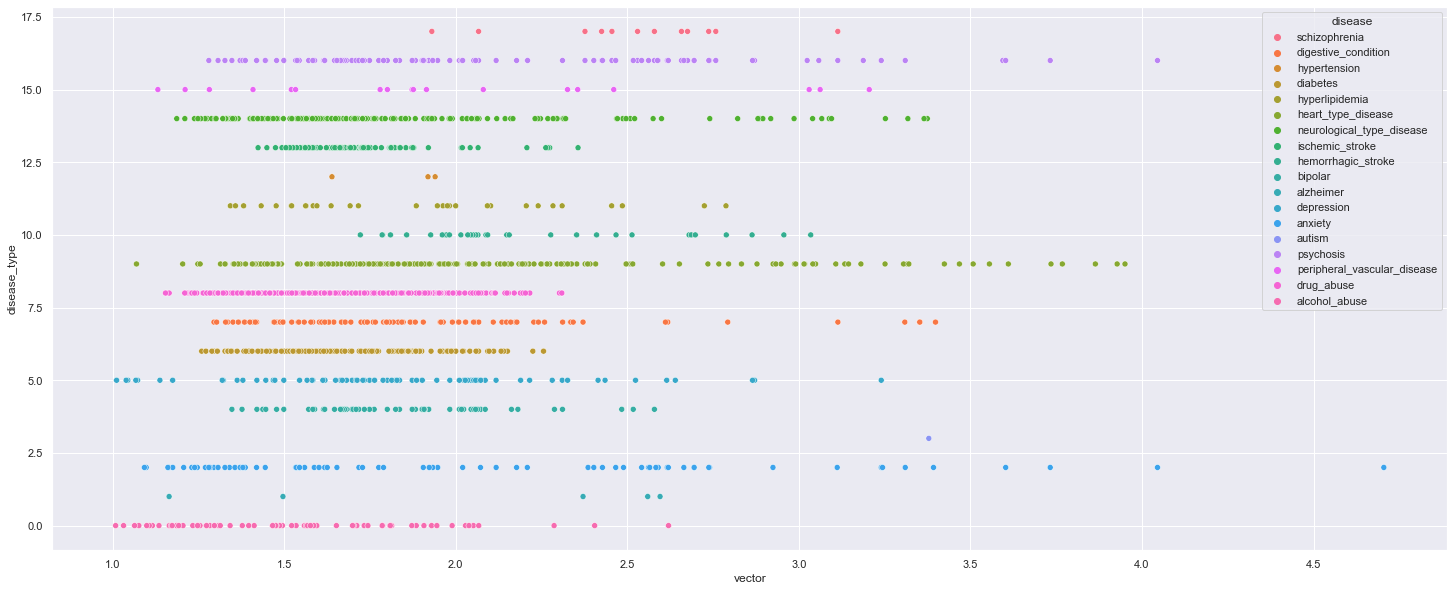

In [23]:
sns.set(rc = {'figure.figsize':(25,10)})
g = sns.scatterplot(x = df.vector ,y = df.disease_type, hue=df.disease)
strFileName = output_path+"/icd"+icd_version+"_remove_outlier.jpeg"
plt.savefig(strFileName, dpi = 300)

## compare vector and get intersection count

In [24]:
strD1 = "psychosis"
strD2 = "heart_type_disease"
strD3 = "neurological_type_disease"
df

,disease,icd_code,title,vector,disease_type,AVG,MEDIAN,STD,MAX,MIN,STD_COUNT,STD_COUNT(AVG)
0,schizophrenia,F200,Paranoid schizophrenia,3.113538,17,2.525450,2.554457,0.314709,3.113538,1.930425,1.868672,0.727155
1,schizophrenia,F201,Disorganized schizophrenia,2.425204,17,2.525450,2.554457,0.314709,3.113538,1.930425,0.318534,0.727155
2,schizophrenia,F202,Catatonic schizophrenia,2.529963,17,2.525450,2.554457,0.314709,3.113538,1.930425,0.014341,0.727155
3,schizophrenia,F203,Undifferentiated schizophrenia,2.455258,17,2.525450,2.554457,0.314709,3.113538,1.930425,0.223037,0.727155
4,schizophrenia,F205,Residual schizophrenia,1.930425,17,2.525450,2.554457,0.314709,3.113538,1.930425,1.890712,0.727155
...,...,...,...,...,...,...,...,...,...,...,...,...
1625,alcohol_abuse,T5191XA,Toxic effect of unspecified alcohol accidental...,1.099444,0,1.592828,1.558857,0.432616,3.199145,1.008932,1.140466,0.742709
1626,alcohol_abuse,T5192XA,Toxic effect of unspecified alcohol intentiona...,1.296544,0,1.592828,1.558857,0.432616,3.199145,1.008932,0.684865,0.742709
1627,alcohol_abuse,T5193XA,Toxic effect of unspecified alcohol assault in...,1.273769,0,1.592828,1.558857,0.432616,3.199145,1.008932,0.737510,0.742709
1628,alcohol_abuse,T5194XA,Toxic effect of unspecified alcohol undetermin...,1.192795,0,1.592828,1.558857,0.432616,3.199145,1.008932,0.924684,0.742709


In [25]:
def getCrossRef(aryNp1,aryNp2):

    lst = []
    lstAvg = []

    #print(len(dic1),len(dic2))

    for v1 in aryNp1:
        lst = []
        for v2 in aryNp2:

            lst.append([abs(v1-v2)])

        lstAvg.append(np.array(lst).mean())

    return np.array(lstAvg).mean()

In [26]:
for strD in lstDiseaseT:
    avg = float(df.loc[(df.disease==strD),["vector"]].mean())
    med = float(df.loc[(df.disease==strD),["vector"]].median())

    df.loc[(df.disease == strD),['AVG']] = avg
    df.loc[(df.disease == strD),['MEDIAN']] = med

lstJoin = []
lstJoin.append(df.loc[(df.disease == strD1),["disease","icd_code","title","vector","AVG","MEDIAN"]])
lstJoin.append(df.loc[(df.disease == strD2),["disease","icd_code","title","vector","AVG","MEDIAN"]])
lstJoin.append(df.loc[(df.disease == strD3),["disease","icd_code","title","vector","AVG","MEDIAN"]])
dfCompare = pd.concat(lstJoin)

strFileName = output_path+"/compare_disease_list.csv"
dfCompare.to_csv(strFileName)


In [27]:
dfD1 = df.loc[(df.disease == strD1),["vector"]]
dfD2 = df.loc[(df.disease == strD2),["vector"]]
dfD3 = df.loc[(df.disease == strD3),["vector"]]

lstsubVecDisease = [
    strD1+" - "+strD2,
    strD1+" - "+strD3,
    strD2+" - "+strD1,
    strD2+" - "+strD3,
    strD3+" - "+strD1,
    strD3+" - "+strD2]

lstCorossRef = []
lstCorossRef.append(getCrossRef(np.array(dfD1),np.array(dfD2)))
lstCorossRef.append(getCrossRef(np.array(dfD1),np.array(dfD3)))
lstCorossRef.append(getCrossRef(np.array(dfD2),np.array(dfD1)))
lstCorossRef.append(getCrossRef(np.array(dfD2),np.array(dfD3)))
lstCorossRef.append(getCrossRef(np.array(dfD3),np.array(dfD1)))
lstCorossRef.append(getCrossRef(np.array(dfD3),np.array(dfD2)))

lstAVGSubVec = []
lstAVGSubVec.append(abs(dfD1.vector.mean()-dfD2.vector.mean()))
lstAVGSubVec.append(abs(dfD1.vector.mean()-dfD3.vector.mean()))
lstAVGSubVec.append(abs(dfD2.vector.mean()-dfD1.vector.mean()))
lstAVGSubVec.append(abs(dfD2.vector.mean()-dfD3.vector.mean()))
lstAVGSubVec.append(abs(dfD3.vector.mean()-dfD1.vector.mean()))
lstAVGSubVec.append(abs(dfD3.vector.mean()-dfD2.vector.mean()))

lstMedSubVec = []
lstMedSubVec.append(abs(dfD1.vector.median()-dfD2.vector.median()))
lstMedSubVec.append(abs(dfD1.vector.median()-dfD3.vector.median()))
lstMedSubVec.append(abs(dfD2.vector.median()-dfD1.vector.median()))
lstMedSubVec.append(abs(dfD2.vector.median()-dfD3.vector.median()))
lstMedSubVec.append(abs(dfD3.vector.median()-dfD1.vector.median()))
lstMedSubVec.append(abs(dfD3.vector.median()-dfD2.vector.median()))

strFileName = output_path+"/icd"+icd_version+"_sub_vec.csv"
d = {"case":lstsubVecDisease,"cross_ref":lstCorossRef,
    "avg_sub_vec":lstAVGSubVec,"median_sub_vec":lstMedSubVec}
pd.DataFrame(data=d).to_csv(strFileName)


In [ ]:
def getConnString(path:str = './db_conn.txt')->dict:
    dic_conn_str = {}

    f = open('./db_conn.txt', 'r')

    lst_tmp = []
    for line in f.readlines():
        lst_tmp = line.split(':')
        dic_conn_str[lst_tmp[0]] = lst_tmp[1].replace('\n','')

    f.close()
    del lst_tmp

    print(dic_conn_str)
    return dic_conn_str

In [28]:
import psycopg2


dic = getConnString(path='./db_conn.txt')

conn_string = f"host={dic['host']} dbname={dic['dbname']} user={dic['user']} password={dic['password']}"

conn = psycopg2.connect(conn_string)
cursor = conn.cursor()

def excuteSqltoInt(cursor,strSql):
    lst = []

    cursor.execute(strSql)
    for row in cursor:
       lst = lst + list(row)
    return lst

def getCountByIcdCode(cursor,strIcdCodeList,strVer):
	intRtn = 0
	strSql = """
    select count(*) as count from
	(
		select 
			distinct subject_id
		from 
			mimic_hosp.diagnoses_icd 
		where 
			icd_code in("""+strIcdCodeList+""")
		and
			icd_version = '"""+strVer+"""'
	) as tmp
    """

	lst = excuteSqltoInt(cursor,strSql)
	intRtn = int(lst[0])
	print(strSql)

	return 	intRtn

def getIntersectionCountByIcdCode(cursor,strIcdCodeList1,strIcdCodeList2,strVer):
	intRtn = 0
	strSql = """
	select count(*) as count from 
	(
		select 
			distinct subject_id
		from 
			mimic_hosp.diagnoses_icd 
		where 
			icd_code in("""+strIcdCodeList1+""")
		and
			icd_version = '"""+strVer+"""'
	) as a,
	(
		select 
			distinct subject_id
		from 
			mimic_hosp.diagnoses_icd 
		where 
			icd_code in("""+strIcdCodeList2+""")
		and
			icd_version = '"""+strVer+"""'
	) as b
	where a.subject_id = b.subject_id
    """

	lst = excuteSqltoInt(cursor,strSql)
	intRtn = int(lst[0])
	print(strSql)
	
	return intRtn

In [29]:
def getIcdCodeList(dfIcdCode):

    strIcdCodeList = ""
    
    for idx in dfIcdCode.index:
        strIcdCodeList = strIcdCodeList + "'" + str(dfIcdCode.loc[idx].icd_code) + "',"
	
    print(strIcdCodeList)
    return strIcdCodeList[0:len(strIcdCodeList)-1]

In [30]:
dfIcdCode1 = df.loc[(df.disease == strD1),["icd_code"]]
dfIcdCode2 = df.loc[(df.disease == strD2),["icd_code"]]
dfIcdCode3 = df.loc[(df.disease == strD3),["icd_code"]]

if len(dfIcdCode1) == 0 | len(dfIcdCode2) == 0 | len(dfIcdCode3) == 0 :
    print(strD1 + " icd_code count:",len(dfIcdCode1))
    print(strD2 + " icd_code count:",len(dfIcdCode2))
    print(strD3 + " icd_code count:",len(dfIcdCode3))
else:
    lstCodeList=[]
    lstCodeList.append(getIcdCodeList(dfIcdCode1))
    lstCodeList.append(getIcdCodeList(dfIcdCode2))
    lstCodeList.append(getIcdCodeList(dfIcdCode3))

    lstDisease=[]
    lstDisease.append(strD1)
    lstDisease.append(strD2)
    lstDisease.append(strD3)

    lstCount=[]
    lstCount.append(getCountByIcdCode(cursor,lstCodeList[0],icd_version))
    lstCount.append(getCountByIcdCode(cursor,lstCodeList[1],icd_version))
    lstCount.append(getCountByIcdCode(cursor,lstCodeList[2],icd_version))

    lstIntersectionCase=[]
    lstIntersectionCase.append(strD1 + "__intersection__" + strD2)
    lstIntersectionCase.append(strD1 + "__intersection__" + strD3)
    lstIntersectionCase.append(strD2 + "__intersection__" + strD3)

    lstIntersectionCount=[]
    lstIntersectionCount.append(getIntersectionCountByIcdCode(cursor,lstCodeList[0],lstCodeList[1],icd_version))
    lstIntersectionCount.append(getIntersectionCountByIcdCode(cursor,lstCodeList[0],lstCodeList[2],icd_version))
    lstIntersectionCount.append(getIntersectionCountByIcdCode(cursor,lstCodeList[1],lstCodeList[2],icd_version))

    print(len(lstDisease),len(lstCount),len(lstIntersectionCase),len(lstIntersectionCount))
    strFileName = output_path+"/icd"+icd_version+"_subjectId_count.csv"
    d = {
        "disease":lstDisease,
        "count":lstCount,
        "intersection_case":lstIntersectionCase,
        "intersection_count":lstIntersectionCount
        }
    pd.DataFrame(data=d).to_csv(strFileName)

'F200','F201','F202','F203','F205','F2081','F2089','F209','F21','F22','F23','F24','F250','F251','F258','F259','F310','F3110','F3111','F3112','F3113','F312','F3130','F3131','F3132','F314','F315','F3160','F3161','F3162','F3163','F3164','F3173','F3174','F3175','F3176','F3177','F3178','F3189','F320','F321','F322','F323','F324','F325','F329','F330','F331','F332','F333','F3340','F3341','F3342','F338','F339','F340','F341','F348','F349','F39','F4000','F4001','F4002','F4010','F4011','F40218','F40220','F40228','F40230','F40231','F40232','F40233','F40240','F40241','F40242','F40243','F40248','F40298','F408','F409','F410','F411','F413','F418','F419','F42','F444','F445','F446','F447','F4489','F450','F4520','F4521','F4522','F4529','F488','F489','F600','F601','F609','F6811','F69','F843','F99','R452','R456',
'I200','I201','I208','I209','I2101','I2102','I2109','I2111','I2119','I2121','I2129','I213','I214','I220','I221','I222','I228','I229','I230','I231','I232','I233','I234','I235','I236','I237','I238','